# Prepare Notebook

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

# Get Germany Data
* plz-gebiete.shp: shapefile with germany postal codes polygons
    * www.suche-postleitzahl.org/downloads
* DEU_adm1.shp: shapefile with germany regions (for plotting only)
    * https://gadm.org/download_country_v3.html

In [2]:
# Read postal codes as strings
df_postalcodes = gpd.read_file('data/plz-gebiete.shp', dtype={'plz': str})
df_postalcodes = df_postalcodes.drop_duplicates(subset=['plz'])

In [3]:
# Read region_shape for plot
df_regions = gpd.read_file('data/DEU_adm1.shp', dtype={'plz': str})
df_regions = df_regions.rename(columns={"NAME_1": "region"})
df_regions.drop(['ID_0','ISO','NAME_0','ID_1','HASC_1','CCN_1','CCA_1','TYPE_1','ENGTYPE_1','NL_NAME_1','VARNAME_1'], axis=1, inplace=True)

# Import or create your postal codes

In [4]:
# Create your POIs
lst = ['01945', '10119', '17039', '27568', '34317', '45665', '58454', '66346', '68766', '82057'] 
df_poi_lst = pd.DataFrame(lst, columns =['plz']) 

In [5]:
# inner join POI list with postal code shapes
df_poi_lst = pd.merge(
    left=df_poi_lst, 
    right=df_postalcodes, 
    on='plz',
    how='inner'
)

In [6]:
# calculate centroid for each shape
df_poi_lst['geometry'] = df_poi_lst['geometry'].values.centroid

C:\ProgramData\Anaconda3\envs\isocyanatMap\lib\site-packages\IPython\core\interactiveshell.py:3337: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (await self.run_code(code, result,  async_=asy)):


In [7]:
# create GeoDataFrame of POI list
gdf = gpd.GeoDataFrame(df_poi_lst, geometry=df_poi_lst.geometry)

# Plot

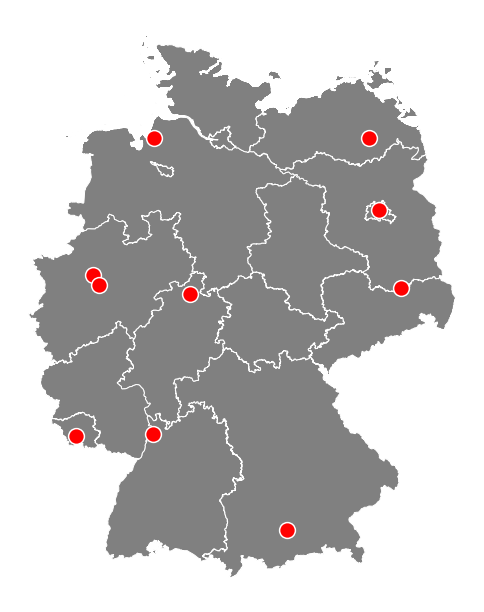

In [8]:
plt.rcParams['figure.figsize'] = [16, 11]

fig, ax = plt.subplots()

bg = df_regions.plot(
    ax=ax,
    categorical=True, 
    legend=False, 
    color='gray',
    alpha=1,
    edgecolor='white',
    linewidth=1,
)

gdf.plot(ax=ax, color="red", edgecolor="white", linewidth=1.5, markersize=250, aa=True);

ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set(
    title='', 
    aspect=1.5, 
    facecolor='none'
);
